In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('../datamining/datasets/breast-cancer.csv') # Ubah sesuai dengan lokasi relatif file breast-cancer.csv
df.head()

,Grouping,Age (years),Education,Working status,Marital status,Menarche (years),Menopause,First pregnancy,Parity,Breastfeeding,Highfat,BMI,Ethnicity
0,BC,>= 50,Senior high school,Housewife,Marriage,12 to 13,< 50 years,20-29 years,>= Multiparous,>=12 months,Normal,Obesity,Minangnese
1,Non-BC,>= 50,Vocational degree,Master's student,Single/ widow,>13,< 50 years,>30 years,>= Multiparous,<12 months,High,Normal,Minangnese
2,BC,>= 50,Senior high school,Housewife,Marriage,7 to 11,< 50 years,20-29 years,>= Multiparous,>=12 months,Normal,Normal,Javanese
3,Non-BC,>= 50,Senior high school,Master's student,Marriage,12 to 13,< 50 years,20-29 years,Primiparous,>=12 months,High,Normal,Javanese
4,BC,>= 50,Senior high school,Private servant,Marriage,>13,< 50 years,20-29 years,>= Multiparous,>=12 months,High,Normal,Minangnese


# Exploratory Data Analysis

### Plot Semua Fitur berdasarkan `Grouping`

In [23]:
def plot_group(data, columns, rows, cols):
	fig, axes = plt.subplots(rows, cols, figsize=(20, rows*5))
	axes = axes.flatten()

	for i, col in enumerate(columns):
		sns.countplot(data=data, x=col, hue='Grouping', ax=axes[i], palette='coolwarm')
		axes[i].set_title(f'Perbandingan {col} dengan Grouping', fontsize=15)
		axes[i].set_xlabel(col, fontsize=12)
		axes[i].set_ylabel('Jumlah', fontsize=12)
		axes[i].tick_params(labelrotation=45)

		for ax in axes[len(columns):]:
			ax.remove()
		plt.tight_layout()

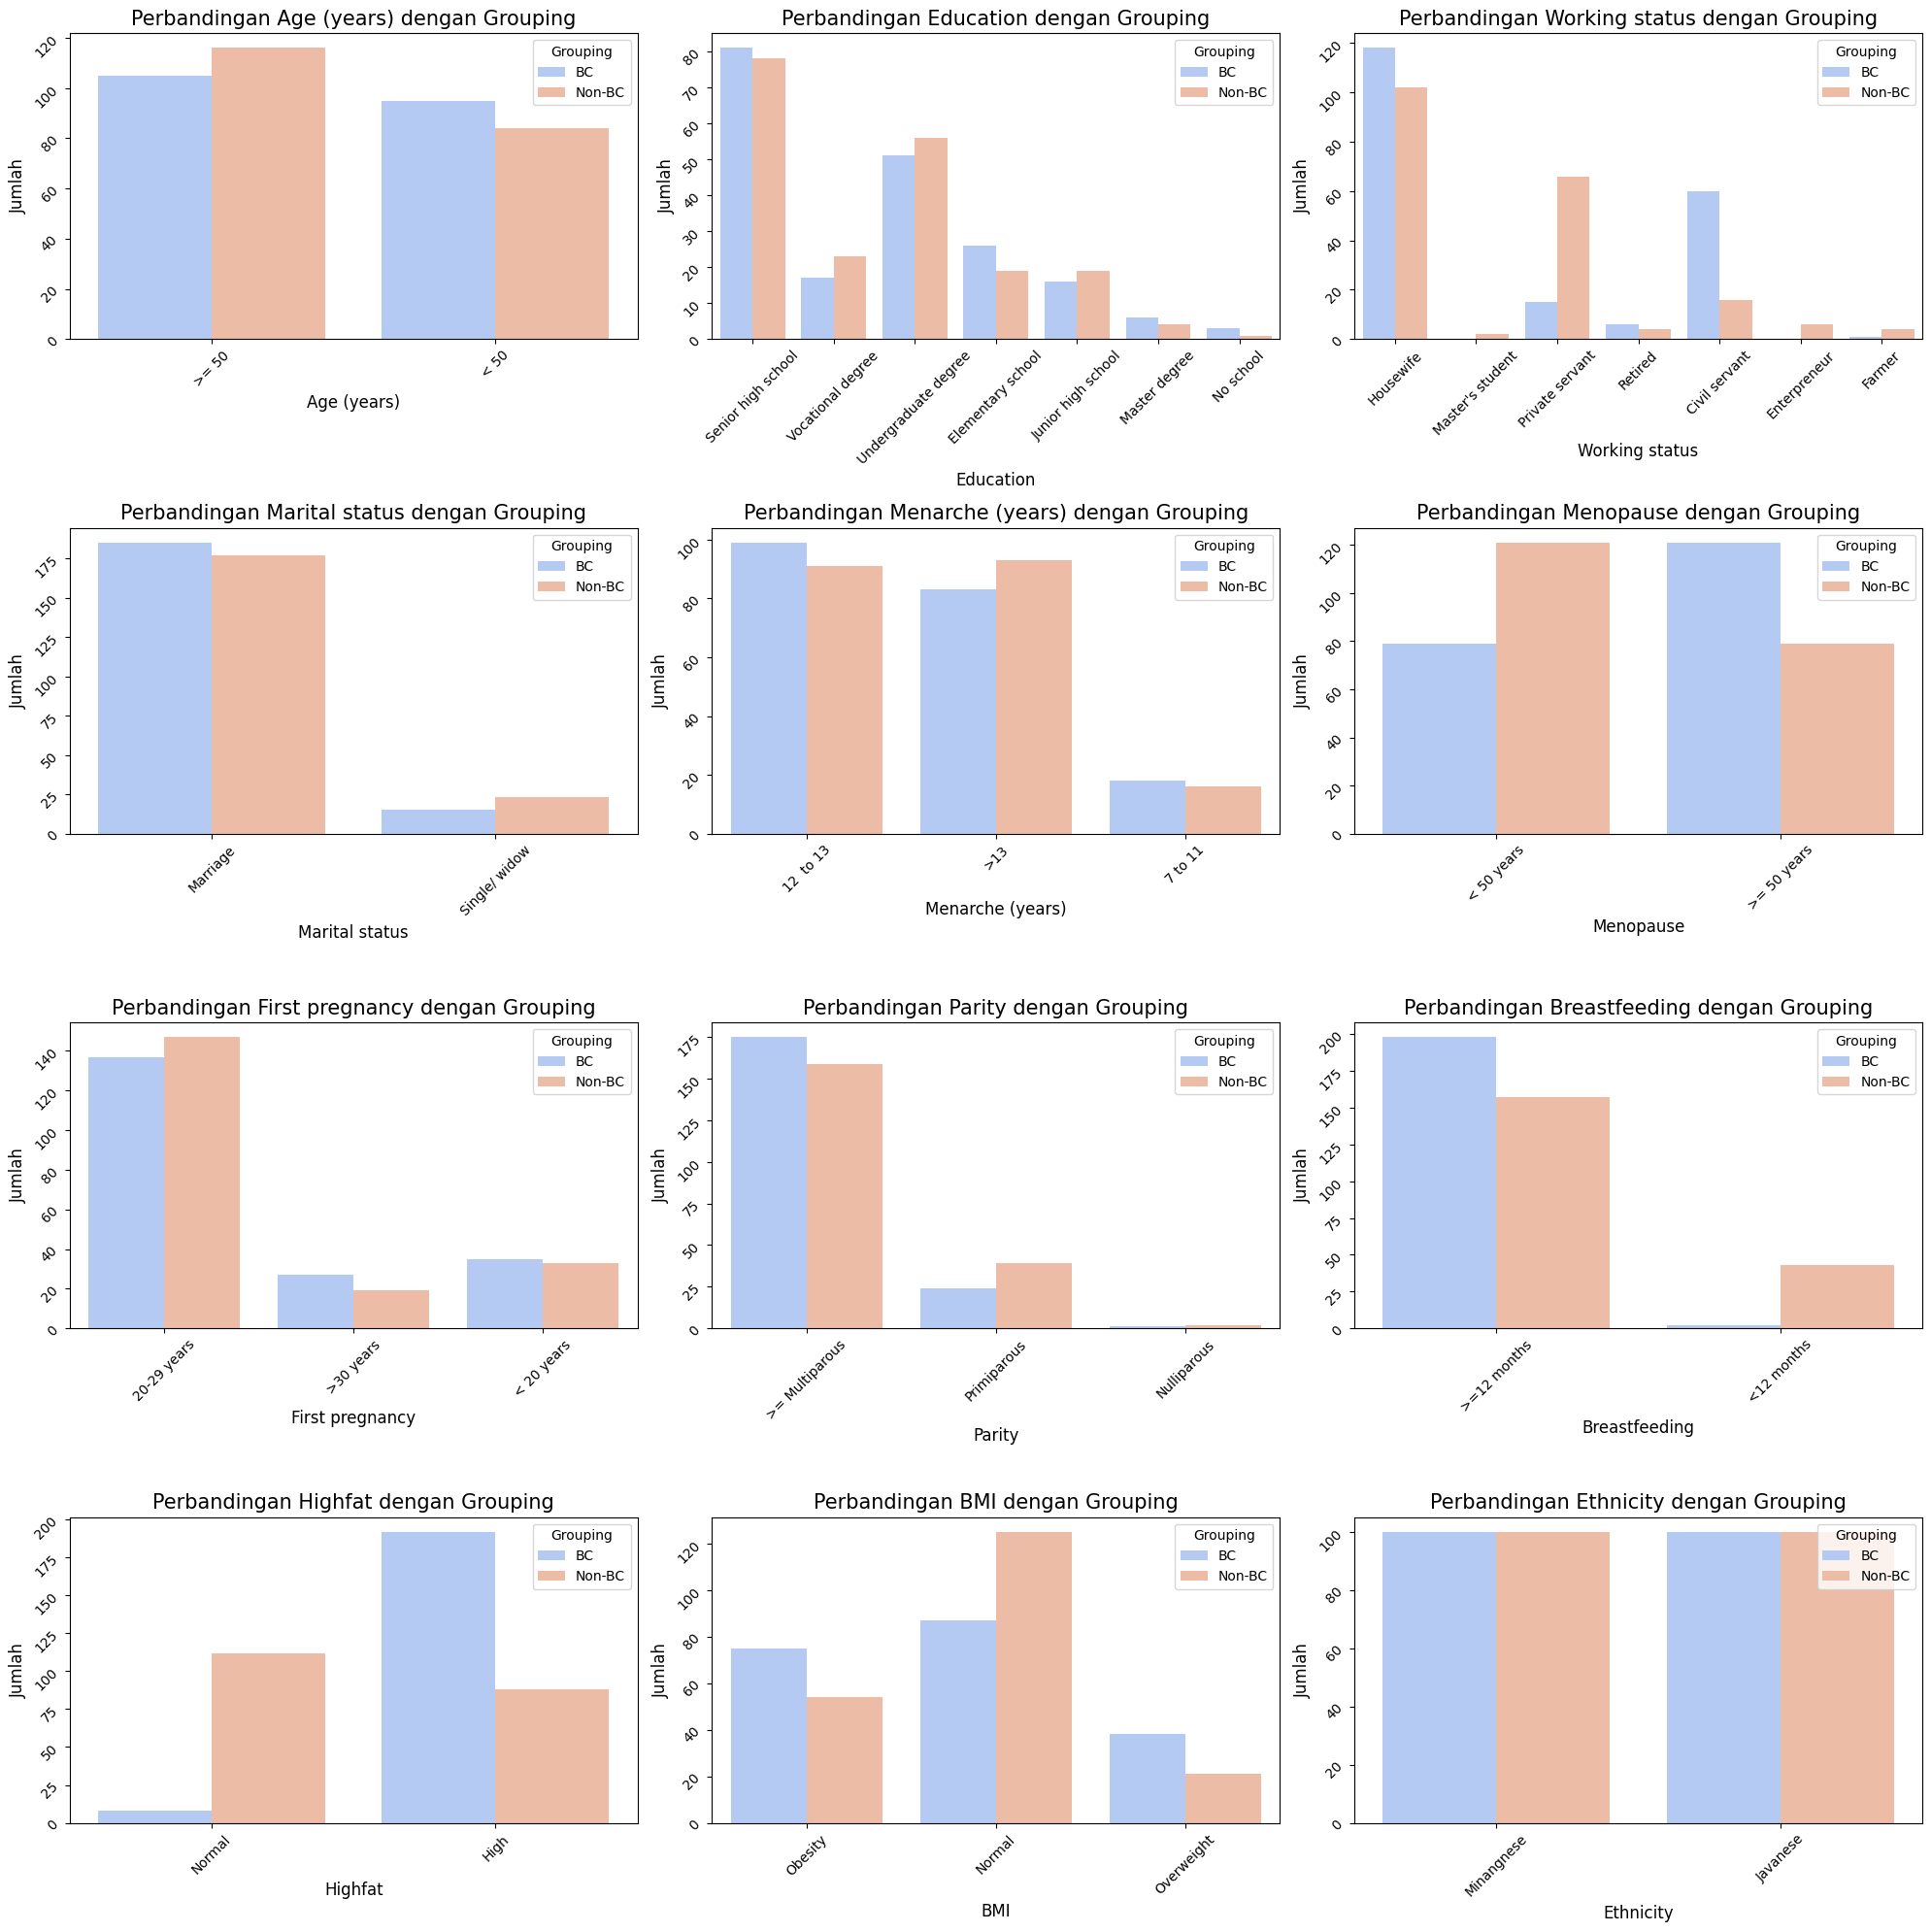

In [24]:
# Plot
plot_columns = df.columns.drop('Grouping')
plot_group(df, plot_columns, 4, 3)

# Data Preprocessing

### Check NaN Values

In [25]:
df.isnull().sum()

Grouping            0
Age (years)         0
Education           0
Working status      0
Marital status      0
Menarche (years)    0
Menopause           0
First pregnancy     2
Parity              0
Breastfeeding       0
Highfat             0
BMI                 0
Ethnicity           0
dtype: int64

#### Check Most Frequent Value in NaN Column

<Axes: xlabel='First pregnancy'>

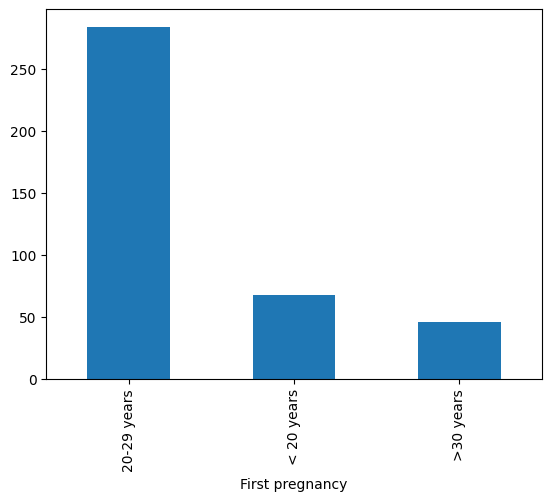

In [26]:
df['First pregnancy'].value_counts().plot.bar()

#### Imputasion

In [27]:
df['First pregnancy'] = df['First pregnancy'].fillna('20-29 years')

#### Last Check NaN Value

In [28]:
df.isnull().sum()

Grouping            0
Age (years)         0
Education           0
Working status      0
Marital status      0
Menarche (years)    0
Menopause           0
First pregnancy     0
Parity              0
Breastfeeding       0
Highfat             0
BMI                 0
Ethnicity           0
dtype: int64

### Label Encoder

#### Check amount of unique values in column

In [29]:
df.nunique()

Grouping            2
Age (years)         2
Education           7
Working status      7
Marital status      2
Menarche (years)    3
Menopause           2
First pregnancy     3
Parity              3
Breastfeeding       2
Highfat             2
BMI                 3
Ethnicity           2
dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in df.columns:
    df[col] = label_encoder.fit_transform(df[col])

df.head()

,Grouping,Age (years),Education,Working status,Marital status,Menarche (years),Menopause,First pregnancy,Parity,Breastfeeding,Highfat,BMI,Ethnicity
0,0,1,4,3,0,0,0,0,0,1,1,1,1
1,1,1,6,4,1,2,0,2,0,0,0,0,1
2,0,1,4,3,0,1,0,0,0,1,1,0,0
3,1,1,4,4,0,0,0,0,2,1,0,0,0
4,0,1,4,5,0,2,0,0,0,1,0,0,1


In [31]:
df.nunique()

Grouping            2
Age (years)         2
Education           7
Working status      7
Marital status      2
Menarche (years)    3
Menopause           2
First pregnancy     3
Parity              3
Breastfeeding       2
Highfat             2
BMI                 3
Ethnicity           2
dtype: int64

In [32]:
from sklearn.model_selection import train_test_split

X = df.drop('Grouping', axis=1)
y = df['Grouping']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Engineering

## METHOD DEFINITION OF FEATURE SELECTION

### 1. Feature Selection Using Chi-Square Test

The Chi-square test is a statistical test that's used to determine if there's a significant association between two categorical variables in a sample. It's based on the difference between the observed frequencies in each category of a cross-tabulation, and the frequencies that we would expect to get by chance alone.

The test calculates a statistic that follows a Chi-square distribution, which is where it gets its name. The degrees of freedom for the test are determined by the number of categories in each variable.

The null hypothesis for the test is that the variables are independent, and the alternative hypothesis is that they are not independent. If the p-value of the test is less than the chosen significance level (often 0.05), then we reject the null hypothesis and conclude that there is a significant association between the variables.

Here's how can get the p-value from Chi-Square Statistical Test in Python using the `sklearn` library:

```python
from sklearn.feature_selection import chi2

# Assume X_train is your train feature matrix and y_train are your train labels
chi2_stats, p_values = chi2(X_train, y_train)

# Get the P-value in series type
p_value_series = pd.Series(p_values, index=X_train.columns)

# Print the P-value in each feature
for i, val in enumerate(p_value_series):
    print(f'Feature {p_value_series.index[i]} : {val}')
```

### 2. Feature Selection Using Feature Importance (Random Forest)

Feature importance in a Random Forest model refers to the average contribution of each feature in improving the predictions made by the model. It's a measure of how much the model's predictions depend on each feature.

Random Forest calculates feature importance based on the decrease in node impurity, which is weighted by the probability of reaching that node (which is approximated by the number of samples that reach the node). The higher the value, the more important the feature.

In other words, a feature has a high importance if it significantly improves the predictive accuracy of the model, and a low importance if it doesn't contribute much to the model's accuracy, or even decreases it.

Here's how you can get feature importance from a Random Forest model in Python using the `sklearn` library:

```python
from sklearn.ensemble import RandomForestClassifier

# Assume X is your feature matrix and y are your labels
clf = RandomForestClassifier()
clf.fit(X, y)

# Get feature importances
importances = clf.feature_importances_

# Print feature importances
for feature, importance in zip(X.columns, importances):
    print(f'Feature: {feature}, Importance: {importance}')
```

### 3. Feature Selection Using Feature Importance (Gradient Boosting Tree)

Feature importance in a Random Forest model refers to the average contribution of each feature in improving the predictions made by the model. It's a measure of how much the model's predictions depend on each feature.

Random Forest calculates feature importance based on the decrease in node impurity, which is weighted by the probability of reaching that node (which is approximated by the number of samples that reach the node). The higher the value, the more important the feature.

In other words, a feature has a high importance if it significantly improves the predictive accuracy of the model, and a low importance if it doesn't contribute much to the model's accuracy, or even decreases it.

Here's how you can get feature importance from a Random Forest model in Python using the `sklearn` library:

```python
from sklearn.ensemble import RandomForestClassifier

# Assume X is your feature matrix and y are your labels
clf = RandomForestClassifier()
clf.fit(X, y)

# Get feature importances
importances = clf.feature_importances_

# Print feature importances
for feature, importance in zip(X.columns, importances):
    print(f'Feature: {feature}, Importance: {importance}')
```

## Feature Selection using `Chi-Square`

In [33]:
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split

#### Chi-square Method

In [34]:
# Train with Chi Square Method
chi2_stats, p_values = chi2(X_train, y_train)

# P-values series features
p_value_series = pd.Series(p_values, index=X_train.columns).sort_values(ascending=True)

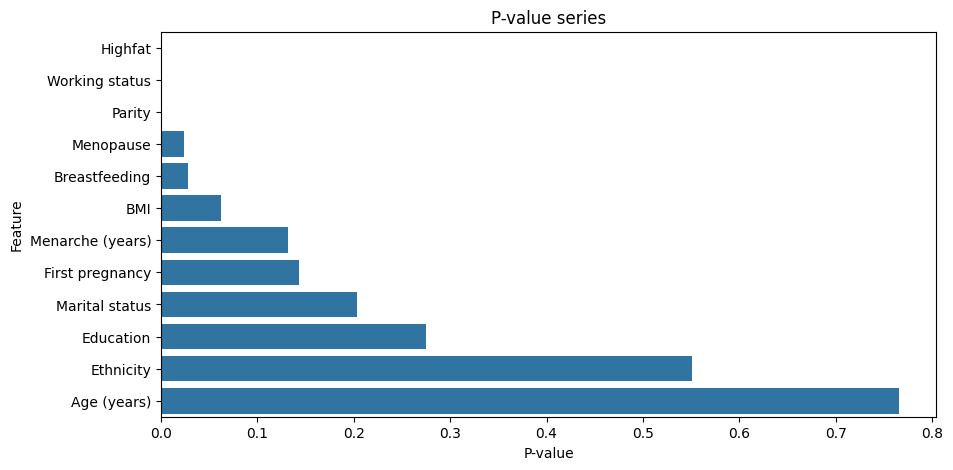

In [35]:
# Plot all features with p-values
plt.figure(figsize=(10,5))
sns.barplot(x=p_value_series.values, y=p_value_series.index)
plt.xlabel('P-value')
plt.ylabel('Feature')
plt.title('P-value series')
plt.show()

A lower p-value indicates that the feature is statistically significant in relation to the target variable, with a small p-value often implying a strong association.

## Feature Selection using `Random Forest`

In [36]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Initialize Random Forest classifier
clf = RandomForestClassifier()

# Split data into features and target
X = df.drop('Grouping', axis=1)
y = df['Grouping']

# Train classifier
clf.fit(X, y)

# Get feature importances
feature_importances = clf.feature_importances_

# Sort feature importances and get indices of top 6 features
sorted_indices = np.argsort(feature_importances)[::-1]
top_n = 5
top_features = sorted_indices[:top_n]
top_all = sorted_indices[:12]

# Print feature importances
for i, importance in enumerate(feature_importances):
    print(f"Feature {i}: {importance}")


Feature 0: 0.03799366159995225
Feature 1: 0.11668753938019974
Feature 2: 0.15067117618004366
Feature 3: 0.026922532394966184
Feature 4: 0.06766266681335252
Feature 5: 0.04464337543739399
Feature 6: 0.054810130235100785
Feature 7: 0.028009299947862103
Feature 8: 0.06040277081748167
Feature 9: 0.29192233966347697
Feature 10: 0.07113621277073928
Feature 11: 0.04913829475943085


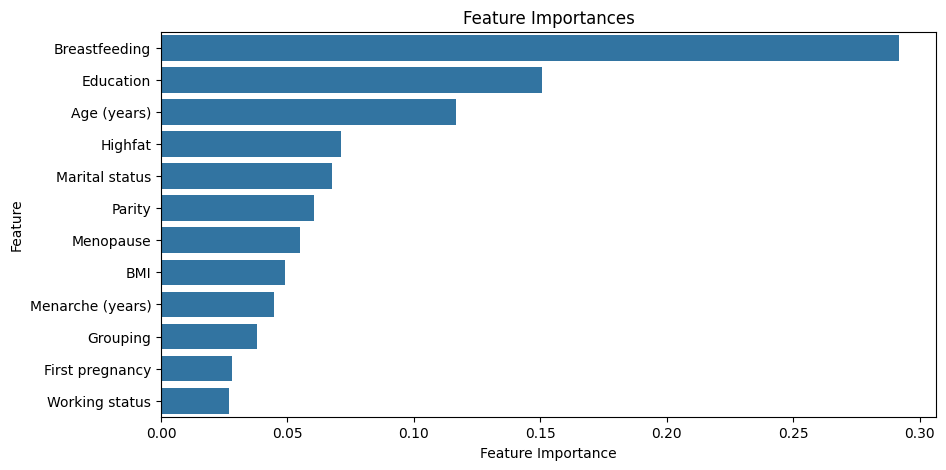

In [37]:
# Plot all features importances using seaborn
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances[top_all], y=df.columns[top_all])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

## Feature Selection Using `Gradient Boosting Tree`

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting classifier
clf = GradientBoostingClassifier()

# Train classifier
clf.fit(X, y)

# Get feature importances
feature_importances = clf.feature_importances_

# Sort feature importances and get indices of top 6 features
sorted_indices = np.argsort(feature_importances)[::-1]
top_n = 5
top_features = sorted_indices[:top_n]
top_all = sorted_indices[:12]

# Print feature importances
for i, importance in enumerate(feature_importances):
	print(f"Feature {i}: {importance}")

Feature 0: 0.03249610554063481
Feature 1: 0.04604126178404502
Feature 2: 0.13480940236622801
Feature 3: 0.0178315374389772
Feature 4: 0.011761634846009493
Feature 5: 0.03988956374581411
Feature 6: 0.053022223864390185
Feature 7: 0.01261886705115458
Feature 8: 0.09062590566525129
Feature 9: 0.4975747941277413
Feature 10: 0.04070581793258655
Feature 11: 0.02262288563716745


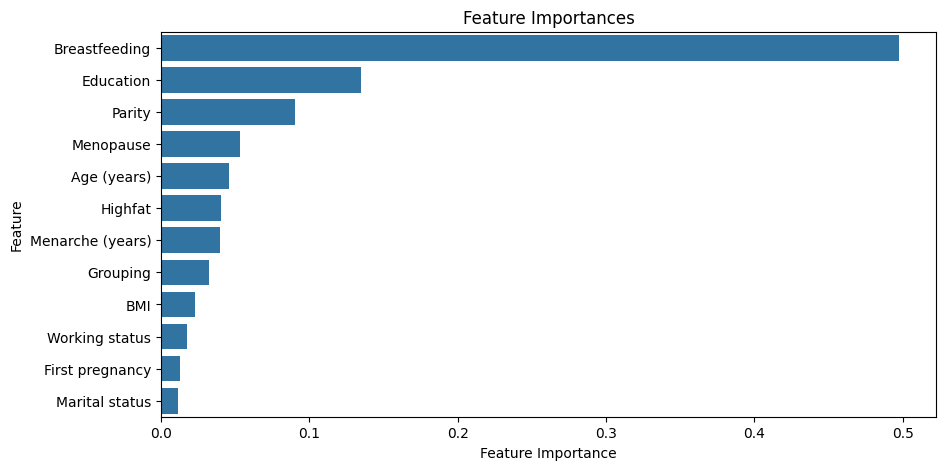

In [39]:
# Plot all features importances using seaborn
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances[top_all], y=df.columns[top_all])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()